# Install libraries


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from scipy.stats import pearsonr


# Loading Data

In [3]:
data = pd.read_csv('data.csv')
data.head()

,Company,File No.,Opened,Closed,Coverage,SubCoverage,Reason,SubReason,Disposition,Conclusion,Recovery,Status
0,"Anthem Health Plans, Inc",7045593,05/31/2022,06/02/2022,Group,Health Only,Claim Handling,Medically Necessary,Company Position Substantiated,Company Position Upheld,0.00,Closed
1,"Anthem Health Plans, Inc",7043381,02/28/2022,06/02/2022,Group,Health Only,Claim Handling,Provider Contract Issue,Claim Settled,Satisfied,6467.30,Closed
2,"Anthem Health Plans, Inc",7044860,05/03/2022,06/02/2022,A & H,Health Only,Claim Handling,Denial,Claim Settled,Claim Paid,147.58,Closed
3,"Anthem Health Plans, Inc",7043381,02/28/2022,06/02/2022,Group,A & H,Claim Handling,Provider Contract Issue,Claim Settled,Satisfied,6467.30,Closed
4,"Anthem Health Plans, Inc",7052007,02/23/2023,03/17/2023,A & H,A & H,Marketing & Sales,Duplicate Coverage,Compromised Settlement/Resolution,Premium Refund,2179.32,Closed


# Descriptive Statistics & Summary Measures
### Calculate mean, median, standard deviation, quartiles, and range for numerical variables


In [4]:
data.info()

# File No is an id
# Recovery is useful

recovery = data['Recovery']
recovery_mean = np.mean(recovery)
recovery_median = np.median(recovery)
recovery_std = np.std(recovery)
recovery_min = np.min(recovery)
recovery_max = np.max(recovery)
recovery_range = recovery_max - recovery_min
recovery_quartiles = np.percentile(recovery, [25, 50, 75, 100])

print("\n")
print(f'Mean: {recovery_mean:.2f}')
print(f'Median: {recovery_median:.2f}')
print(f'Standard Deviation: {recovery_std:.2f}')
print(f'Range: {recovery_range:.2f}')
print(f'Quartiles: {recovery_quartiles}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68469 entries, 0 to 68468
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      68469 non-null  object 
 1   File No.     68469 non-null  int64  
 2   Opened       68469 non-null  object 
 3   Closed       66992 non-null  object 
 4   Coverage     65130 non-null  object 
 5   SubCoverage  55020 non-null  object 
 6   Reason       65057 non-null  object 
 7   SubReason    65057 non-null  object 
 8   Disposition  41476 non-null  object 
 9   Conclusion   42809 non-null  object 
 10  Recovery     68469 non-null  float64
 11  Status       68469 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 6.3+ MB


Mean: 1723.51
Median: 0.00
Standard Deviation: 13989.96
Range: 843825.85
Quartiles: [     0.        0.        0.   843825.85]


# Missing Value Analysis
### Identify missing values, analyze their patterns (random or systematic), and calculate the percentage of missing entries for each column.

In [5]:
# Missing values
missing_values = data.isnull().sum()
print("\nTotal Number of Missing Values:")
print(missing_values)

# Percentage of Missing Entries
total_entries = len(data)
missing_percentage = (missing_values / total_entries) * 100
print("\nPercentage of Missing Entries:")
print(missing_percentage)


Total Number of Missing Values:
Company            0
File No.           0
Opened             0
Closed          1477
Coverage        3339
SubCoverage    13449
Reason          3412
SubReason       3412
Disposition    26993
Conclusion     25660
Recovery           0
Status             0
dtype: int64

Percentage of Missing Entries:
Company         0.000000
File No.        0.000000
Opened          0.000000
Closed          2.157181
Coverage        4.876660
SubCoverage    19.642466
Reason          4.983277
SubReason       4.983277
Disposition    39.423681
Conclusion     37.476814
Recovery        0.000000
Status          0.000000
dtype: float64


# Univariate Distribution Visualization
### Create histograms, box plots, or density plots for individual variables.

In [ ]:
recovery_max = np.max(recovery)
print(recovery_max)

843825.85


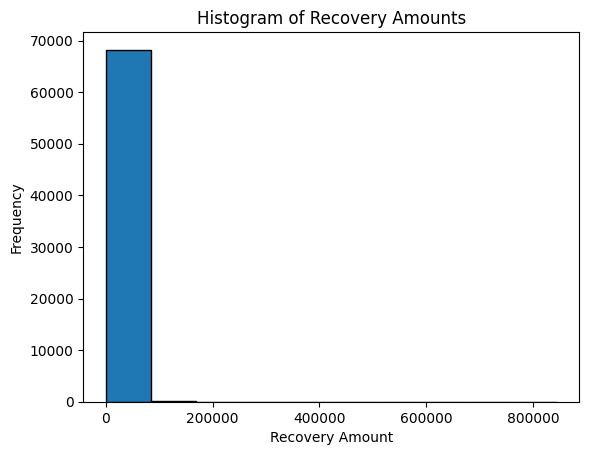

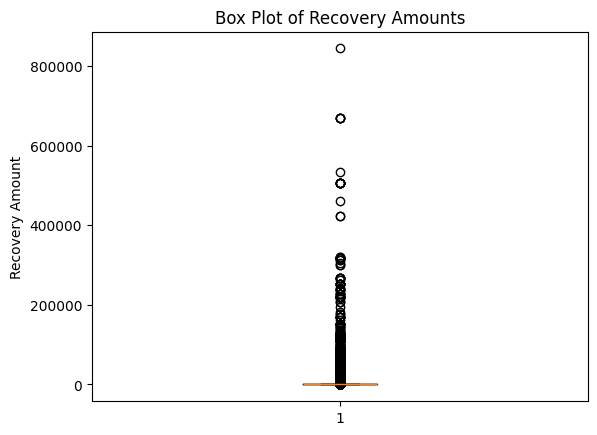

<ipython-input-6-0b29ca802637>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Recovery'], shade=True)


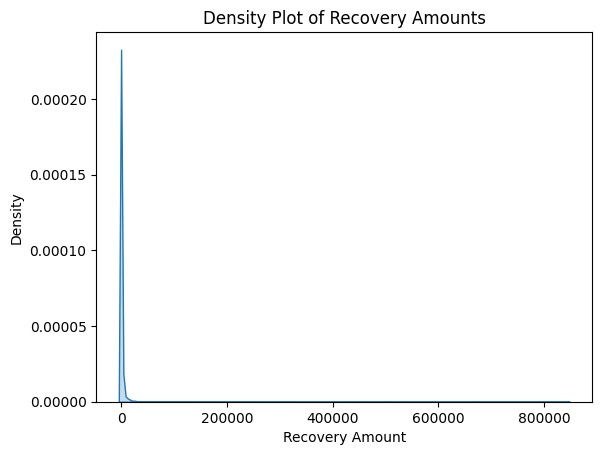

In [6]:
# histogram:
plt.hist(data['Recovery'], edgecolor='black')
plt.title('Histogram of Recovery Amounts')
plt.xlabel('Recovery Amount')
plt.ylabel('Frequency')
plt.show()

# box plot:
plt.boxplot(data['Recovery'])
plt.title('Box Plot of Recovery Amounts')
plt.ylabel('Recovery Amount')
plt.show()

# density plot:
sns.kdeplot(data['Recovery'], shade=True)
plt.title('Density Plot of Recovery Amounts')
plt.xlabel('Recovery Amount')
plt.ylabel('Density')
plt.show()


# Correlation and Relationship Analysis

          File No.  Recovery
File No.  1.000000  0.005019
Recovery  0.005019  1.000000


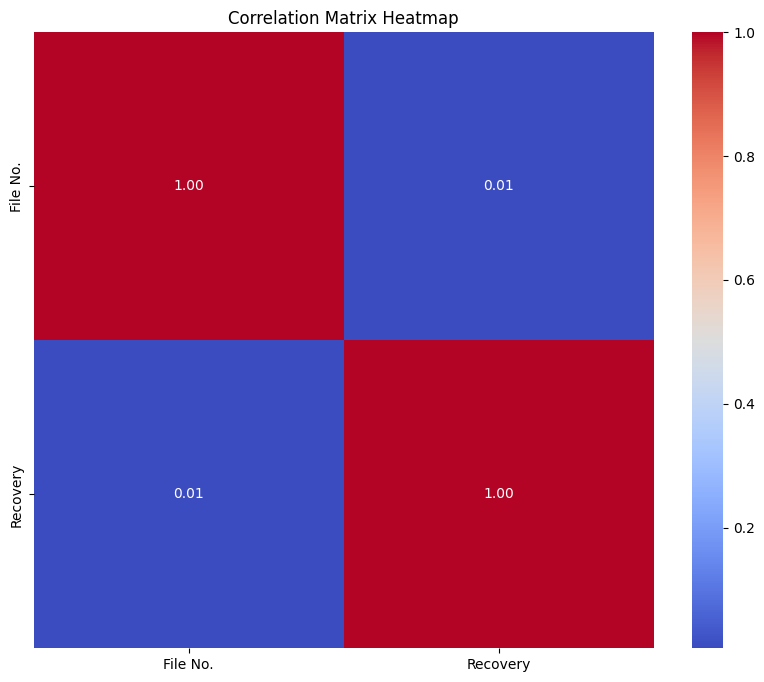

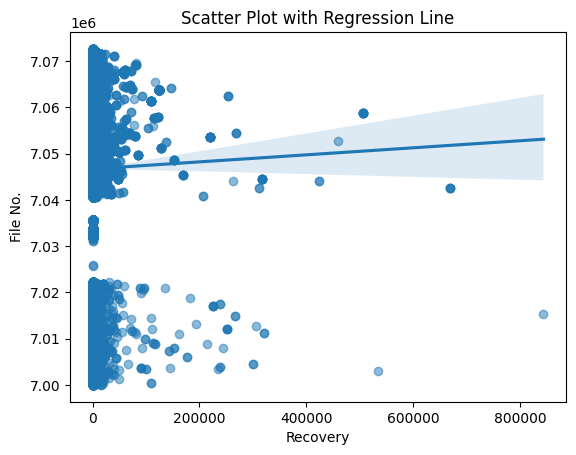

Pearson correlation coefficient: 0.005
P-value: 0.189
                            OLS Regression Results                            
Dep. Variable:               File No.   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.725
Date:                Tue, 04 Mar 2025   Prob (F-statistic):              0.189
Time:                        22:38:47   Log-Likelihood:            -7.7929e+05
No. Observations:               68469   AIC:                         1.559e+06
Df Residuals:                   68467   BIC:                         1.559e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [13]:
# Compute the correlation matrix (select only numeric columns)
numerical_data = data.select_dtypes(include=np.number)
corr_matrix = numerical_data.corr()

# Display the correlation matrix
print(corr_matrix)

# Set the figure size for better readability
plt.figure(figsize=(10, 8))
# Create a heatmap with correlation coefficients annotated
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# Add a title and display the plot
plt.title("Correlation Matrix Heatmap")
plt.show()

# Create a scatter plot with regression line using the actual column names
sns.regplot(x='Recovery', y='File No.', data=data, scatter_kws={'alpha': 0.5})
plt.title("Scatter Plot with Regression Line")
plt.xlabel("Recovery")
plt.ylabel("File No.")
plt.show()

# Compute Pearson correlation coefficient and p-value using 'Recovery' and 'File No.'
corr_coef, p_value = pearsonr(data['Recovery'], data['File No.'])
print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

# Define the independent variable(s) and the dependent variable
X = data[['Recovery']]  # Independent variable(s)
y = data['File No.']     # Dependent variable

# Add a constant to the independent variables (the intercept)
X = sm.add_constant(X)

# Fit the Ordinary Least Squares (OLS) model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())


# Analyzing High Cardinality and Grouping Rare Categories


In [8]:
def analyze_high_cardinality(df, threshold=0.02):
    """
    Identifies high-cardinality categorical columns and groups rare categories.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    threshold (float): The minimum frequency a category must have to not be grouped as 'Other'.

    Returns:
    pd.DataFrame: A modified DataFrame with rare categories grouped.
    """
    categorical_cols = df.select_dtypes(include=['object']).columns

    for col in categorical_cols:
        value_counts = df[col].value_counts(normalize=True)

        # Print unique value distribution before modification
        print(f"\nColumn: {col}")
        print(value_counts)

        rare_categories = value_counts[value_counts < threshold].index
        if len(rare_categories) > 0:
            print(f"\nGrouping {len(rare_categories)} rare categories in {col} under 'Other'\n")
            df[col] = df[col].replace(rare_categories, 'Other')

    return df

# Load CSV file
df = pd.read_csv("data.csv")

# Analyze and modify high-cardinality categorical columns
df_modified = analyze_high_cardinality(df, threshold=0.02)

# Save the modified DataFrame
df_modified.to_csv("modified_data.csv", index=False)

print("High-cardinality analysis complete. Modified data saved.")


Column: Company
Company
Anthem Health Plans, Inc                                      0.213308
ConnectiCare Benefits, Inc.                                   0.053572
UnitedHealthcare Insurance Company                            0.049847
Cigna Health and Life Insurance Company                       0.046532
ConnectiCare Insurance Company, Inc                           0.033796
                                                                ...   
Plaza Insurance Company                                       0.000015
Trenwick America Reinsurance Corporation                      0.000015
StarStone Specialty Insurance Company                         0.000015
Continental Life Insurance Company of Brentwood, Tennessee    0.000015
ARAG Insurance Company                                        0.000015
Name: proportion, Length: 843, dtype: float64

Grouping 837 rare categories in Company under 'Other'


Column: Opened
Opened
01/03/2025    0.003023
09/18/2024    0.002746
02/29/2024    0.002731


Here's what happened:

-In the Company column, 837 rare companies were grouped as "Other" since they had very low proportions in the dataset.
In the Opened, Closed, Coverage, SubCoverage, SubReason, Disposition, Conclusion, and Status columns, categories that appeared infrequently were also grouped under "Other" to reduce complexity.
This helps in:

-Reducing noise by merging very rare categories.
Improving model performance by avoiding too many categories with little data.
Making analysis and visualization clearer by focusing on the most relevant categories.

In [ ]:
file_path = "modified_data.csv"
df = pd.read_csv(file_path)

# Ensure 'Recovery' is numeric
df['Recovery'] = pd.to_numeric(df['Recovery'], errors='coerce')

# Define outliers using the IQR method
Q1 = df['Recovery'].quantile(0.25)
Q3 = df['Recovery'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Recovery'] < lower_bound) | (df['Recovery'] > upper_bound)]
non_outliers = df[(df['Recovery'] >= lower_bound) & (df['Recovery'] <= upper_bound)]

# Calculate statistics
mean_with_outliers = df['Recovery'].mean()
median_with_outliers = df['Recovery'].median()
mean_without_outliers = non_outliers['Recovery'].mean()
median_without_outliers = non_outliers['Recovery'].median()

# Print results
print(f"Mean with outliers: ${mean_with_outliers:.2f}")
print(f"Median with outliers: ${median_with_outliers:.2f}")
print(f"Mean without outliers: ${mean_without_outliers:.2f}")
print(f"Median without outliers: ${median_without_outliers:.2f}")



# Plot distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Recovery'], bins=50, kde=True)
plt.axvline(mean_with_outliers, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median_with_outliers, color='blue', linestyle='dashed', linewidth=1, label='Median')
plt.title('Distribution of Recovery Amounts')
plt.xlabel('Recovery Amount')
plt.ylabel('Frequency')
plt.legend()

# Save the plot
histogram_path = "recovery_histogram.png"
plt.savefig(histogram_path)
plt.close()

print(f"Histogram saved to: {histogram_path}")

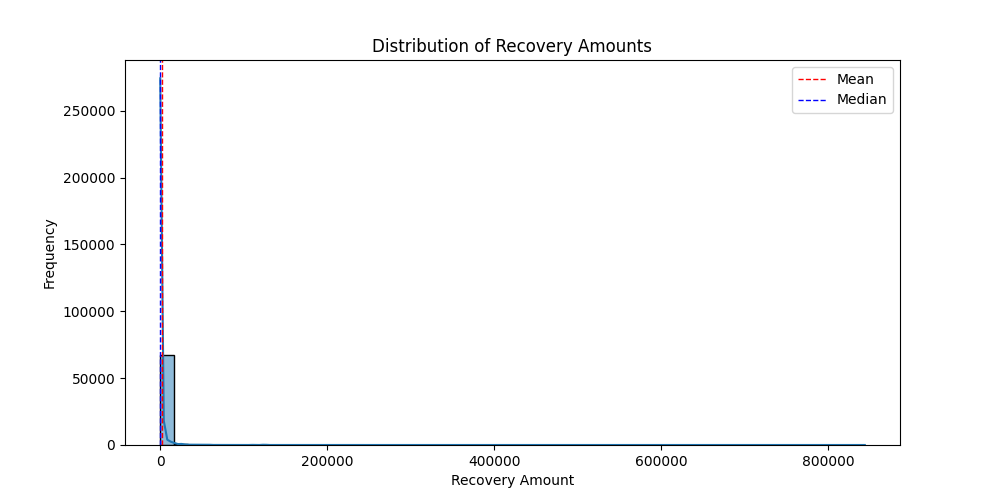

# Frequency and Counting Analysis

In [9]:
df = pd.read_csv('data.csv')

# Remove exact duplicate rows
df = df.drop_duplicates()

# Remove duplicate complaints based on File No.
df = df.drop_duplicates(subset=['File No.'], keep='first')

# Show the first few rows and column names
print("Preview of the dataset:")
print(df.head())
print("\nColumn names:")
print(df.columns)

# Frequency Analysis: Complaints by Company
print("\nTop 10 Companies by Complaint Count:")
top_companies = df['Company'].value_counts().head(10)
print(top_companies)

# Frequency Analysis with Percentages
def print_count_and_percentage(column_name):
    counts = df[column_name].value_counts()
    percentages = df[column_name].value_counts(normalize=True) * 100
    summary = pd.DataFrame({
        'Count': counts,
        'Percentage': percentages
    })
    print(f"\n{column_name} Distribution (Counts and Percentages):")
    print(summary)

print_count_and_percentage('Company')
print_count_and_percentage('Reason')
print_count_and_percentage('Status')
print_count_and_percentage('Conclusion')

# Detect Rare Classes
def print_rare_classes(column_name, threshold=5):
    counts = df[column_name].value_counts()
    rare_classes = counts[counts <= threshold]
    if not rare_classes.empty:
        print(f"\nRare categories in {column_name} (<= {threshold} occurrences):")
        print(rare_classes)
    else:
        print(f"\nNo rare categories found in {column_name} (<= {threshold} occurrences).")

print_rare_classes('Company')
print_rare_classes('Reason')
print_rare_classes('Status')
print_rare_classes('Conclusion')

# Visualization: Top 10 Companies by Complaints
plt.figure(figsize=(10, 6))
sns.barplot(x=top_companies.values, y=top_companies.index, palette='Blues_r')
plt.title('Top 10 Companies by Complaint Count')
plt.xlabel('Number of Complaints')
plt.ylabel('Company')
plt.tight_layout()
plt.savefig('top_companies_barplot.png')
plt.close()

# Visualization: Top Complaint Reasons
top_reasons = df['Reason'].value_counts().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_reasons.values, y=top_reasons.index, palette='muted')
plt.title('Top Complaint Reasons')
plt.xlabel('Number of Complaints')
plt.ylabel('Reason')
plt.tight_layout()
plt.savefig('top_complaint_reasons_barplot.png')
plt.close()

# Visualization: Complaint Status Distribution (Pie Chart)
plt.figure(figsize=(8, 8))
plt.pie(df['Status'].value_counts().head(6), labels=df['Status'].value_counts().head(6).index, autopct='%1.1f%%', startangle=140)
plt.title('Complaint Status Distribution')
plt.tight_layout()
plt.savefig('complaint_status_pie_chart.png')
plt.close()

# Visualization: Complaint Conclusion Distribution (Pie Chart)
plt.figure(figsize=(8, 8))
plt.pie(df['Conclusion'].value_counts().head(6), labels=df['Conclusion'].value_counts().head(6).index, autopct='%1.1f%%', startangle=140)
plt.title('Complaint Conclusion Distribution')
plt.tight_layout()
plt.savefig('complaint_conclusion_pie_chart.png')
plt.close()


Preview of the dataset:
                         Company  File No.      Opened      Closed Coverage  \
0       Anthem Health Plans, Inc   7045593  05/31/2022  06/02/2022    Group   
1       Anthem Health Plans, Inc   7043381  02/28/2022  06/02/2022    Group   
2       Anthem Health Plans, Inc   7044860  05/03/2022  06/02/2022    A & H   
4       Anthem Health Plans, Inc   7052007  02/23/2023  03/17/2023    A & H   
5  Oxford Health Plans (CT), Inc   7054762  06/01/2023  08/02/2023    A & H   

   SubCoverage             Reason                SubReason  \
0  Health Only     Claim Handling      Medically Necessary   
1  Health Only     Claim Handling  Provider Contract Issue   
2  Health Only     Claim Handling                   Denial   
4        A & H  Marketing & Sales       Duplicate Coverage   
5  Health Only     Claim Handling          External Review   

                         Disposition               Conclusion  Recovery  \
0     Company Position Substantiated  Company Positio

<ipython-input-9-3ff3d4ef68f3>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values, y=top_companies.index, palette='Blues_r')
<ipython-input-9-3ff3d4ef68f3>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_reasons.values, y=top_reasons.index, palette='muted')


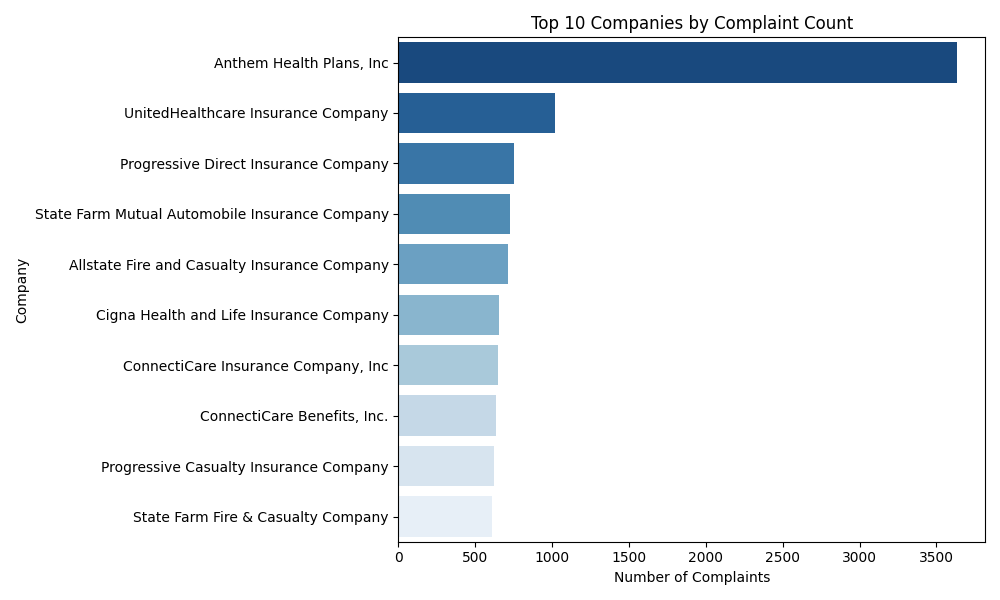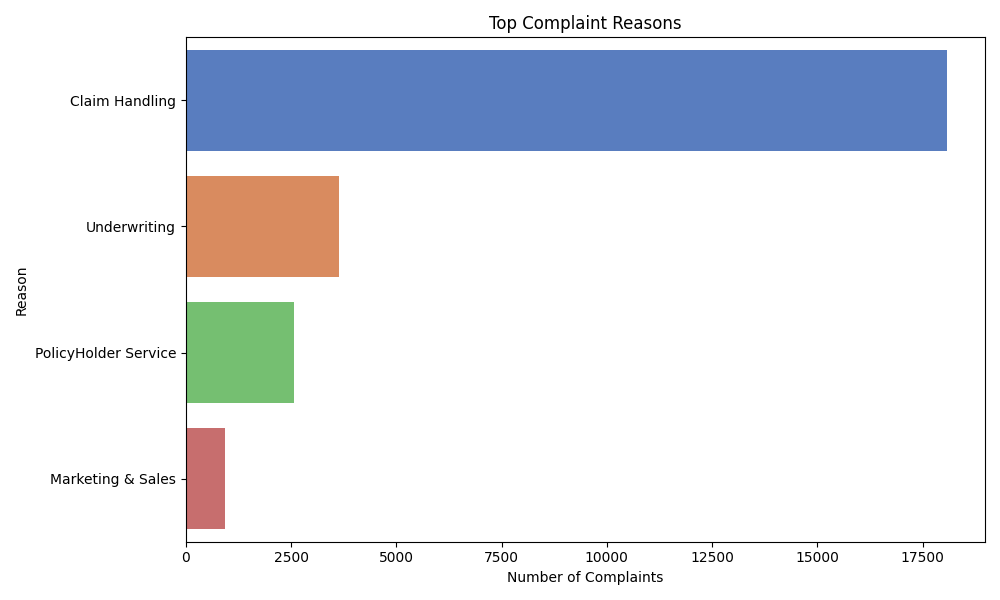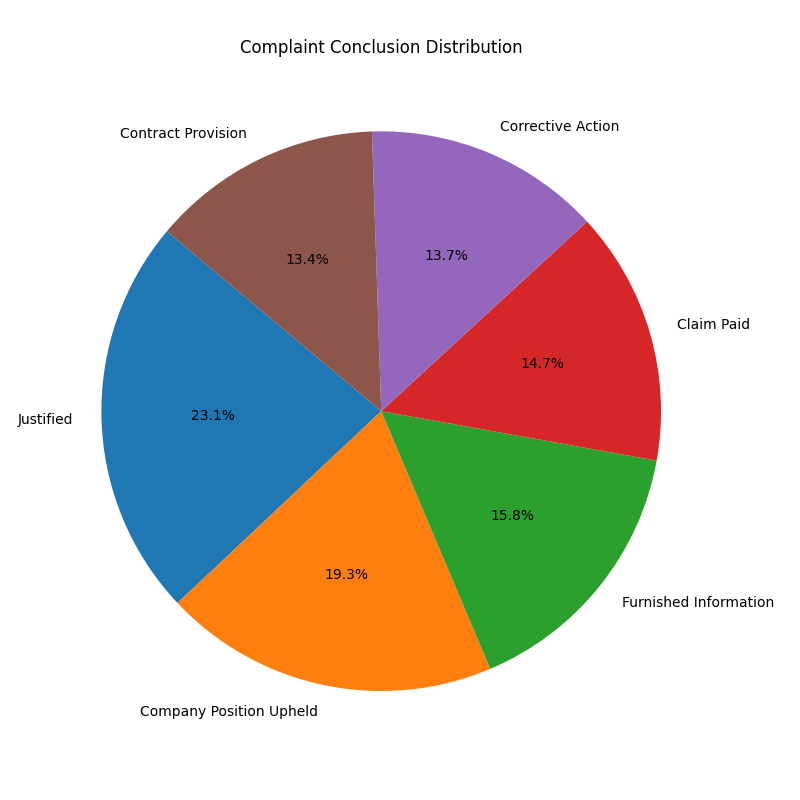

# Extra

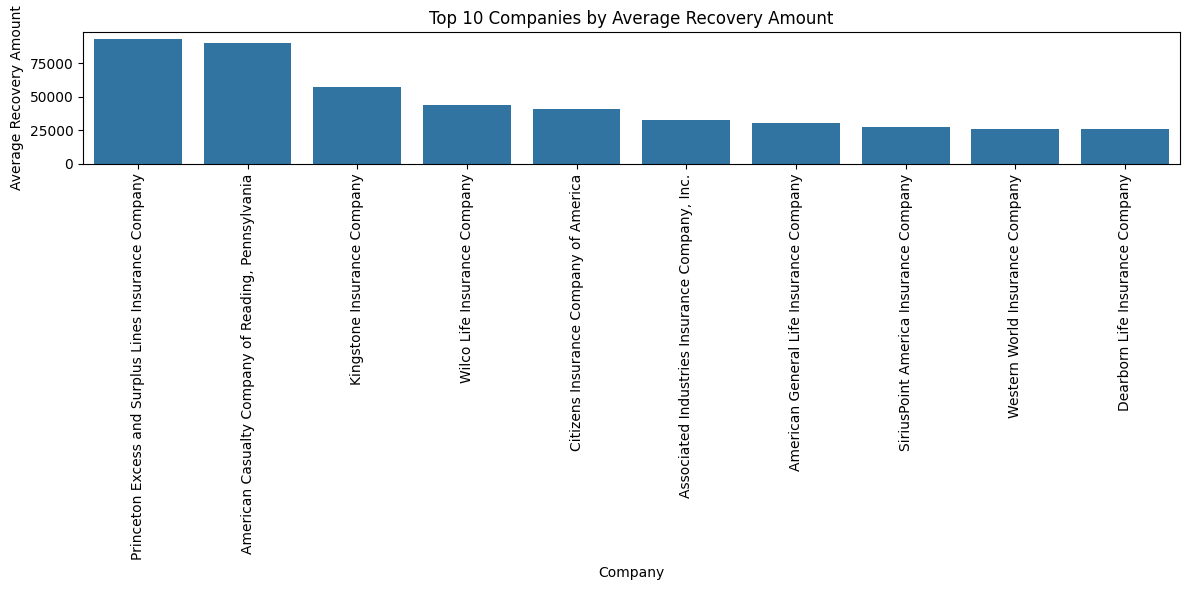

                                               Company      Recovery  \
615  Princeton Excess and Surplus Lines Insurance C...  93272.360000   
57   American Casualty Company of Reading, Pennsylv...  89733.333333   
426                        Kingstone Insurance Company  57435.938261   
834                       Wilco Life Insurance Company  44071.456000   
182              Citizens Insurance Company of America  40780.159200   
110      Associated Industries Insurance Company, Inc.  32320.254000   
67             American General Life Insurance Company  30556.362815   
681              SiriusPoint America Insurance Company  27397.000000   
831                    Western World Insurance Company  26016.394167   
232                    Dearborn Life Insurance Company  25961.538462   

     recovered_count  not_recovered_count  recovery_percentage  
615                2                    0           100.000000  
57                 5                    4            55.555556  
426         

In [10]:
df = pd.read_csv('data.csv')

if 'Company' in df.columns and 'Recovery' in df.columns:

    company_recovery_avg = df.groupby('Company')['Recovery'].mean().reset_index()


    company_recovery_count = df.groupby('Company').agg(
        recovered_count=('Recovery', lambda x: (x > 0).sum()),  # Count non-zero recoveries
        not_recovered_count=('Recovery', lambda x: (x == 0).sum())  # Count zero recoveries
    ).reset_index()


    company_recovery_stats = pd.merge(company_recovery_avg, company_recovery_count, on='Company')


    company_recovery_stats['recovery_percentage'] = (company_recovery_stats['recovered_count'] /
                                                      (company_recovery_stats['recovered_count'] +
                                                       company_recovery_stats['not_recovered_count'])) * 100


    top_companies = company_recovery_stats.nlargest(10, 'Recovery')


    plt.figure(figsize=(12, 6))
    sns.barplot(x='Company', y='Recovery', data=top_companies)
    plt.xticks(rotation=90)
    plt.title('Top 10 Companies by Average Recovery Amount')
    plt.xlabel('Company')
    plt.ylabel('Average Recovery Amount')
    plt.tight_layout()

    # Save the graph as a PNG file
    plt.savefig('top_10_companies_vs_avg_recovery.png')

    # Optionally, display the plot
    plt.show()

    # Print the recovery stats for the top 10 companies
    print(top_companies[['Company', 'Recovery', 'recovered_count', 'not_recovered_count', 'recovery_percentage']])

else:
    print("Necessary columns 'Company' and 'Recovery' are missing.")

Recovery Analysis (with and without outliers)

In [ ]:
file_path = "modified_data.csv"

# Ensure 'Recovery' is numeric
df['Recovery'] = pd.to_numeric(df['Recovery'], errors='coerce')

# Define outliers using the IQR method
Q1 = df['Recovery'].quantile(0.25)
Q3 = df['Recovery'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Recovery'] < lower_bound) | (df['Recovery'] > upper_bound)]
non_outliers = df[(df['Recovery'] >= lower_bound) & (df['Recovery'] <= upper_bound)]

# Calculate statistics
mean_with_outliers = df['Recovery'].mean()
median_with_outliers = df['Recovery'].median()
mean_without_outliers = non_outliers['Recovery'].mean()
median_without_outliers = non_outliers['Recovery'].median()

# Print results
print(f"Mean with outliers: ${mean_with_outliers:.2f}")
print(f"Median with outliers: ${median_with_outliers:.2f}")
print(f"Mean without outliers: ${mean_without_outliers:.2f}")
print(f"Median without outliers: ${median_without_outliers:.2f}")



# Plot distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Recovery'], bins=50, kde=True)
plt.axvline(mean_with_outliers, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median_with_outliers, color='blue', linestyle='dashed', linewidth=1, label='Median')
plt.title('Distribution of Recovery Amounts')
plt.xlabel('Recovery Amount')
plt.ylabel('Frequency')
plt.legend()

# Save the plot
histogram_path = "recovery_histogram.png"
plt.savefig(histogram_path)
plt.close()

print(f"Histogram saved to: {histogram_path}")

Mean with outliers: $1741.72
Median with outliers: $0.00
Mean without outliers: $0.00
Median without outliers: $0.00
Histogram saved to: recovery_histogram.png


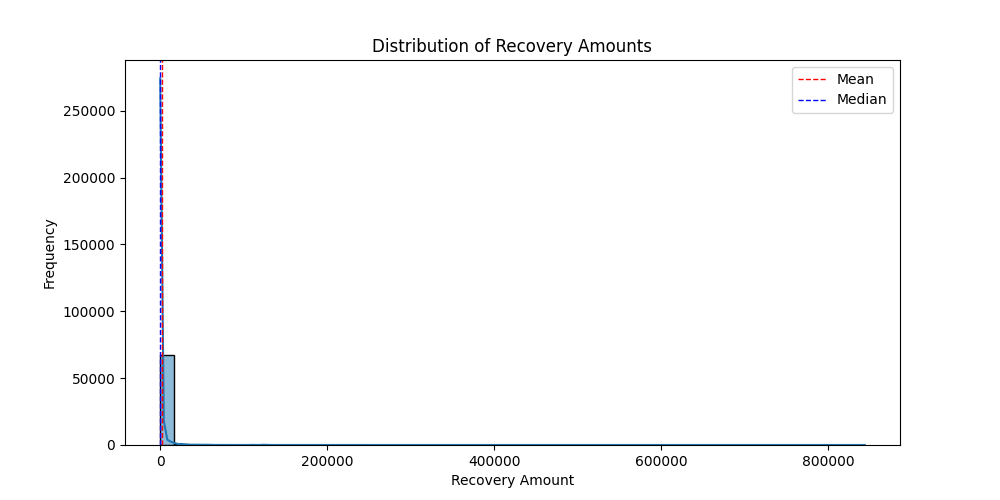